## TP2 Goals

This exercise is about Principal Component Analysis (PCA) and its application to analyzing student grades. **It involves**:

*   Measuring similarity between students using raw and standardized data.
*   Performing **PCA** on a dataset of student grades:
     *   Computing **eigenvalues** and **eigenvectors**.
     *   Selecting principal components based on variance explained.
     *   **Projecting** students onto the new space.

*   Visualizing and interpreting results, including plotting principal components and analyzing student distributions.
*   Comparing results before and after PCA to see how dimensionality reduction affects data interpretation.
*   Calculating distances in the PCA space to measure how far each student is from the center of the data.


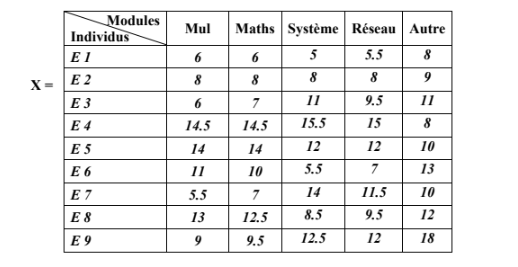

# A)- Similarities

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler

In [3]:
X = np.array([
    [6, 6, 5, 5.5 , 8],
    [8, 8, 8, 8, 9],
    [6, 7, 11, 9.5, 11],
    [14.5, 14.5, 15.5, 15, 8],
    [14, 14, 12, 12, 10],
    [11, 10, 5.5, 7, 13],
    [5.5, 7, 14, 11.5, 10],
    [13, 12.5, 8.5, 9.5, 12],
    [9, 9.5, 12.5, 12, 18]
])


In [4]:
# Extract the relevant individuals (E4, E5, and E7)
E4 = X[3]  # Index 3 corresponds to E4
E5 = X[4]  # Index 4 corresponds to E5
E7 = X[6]  # Index 6 corresponds to E7


In [7]:
# Compute Euclidean distances on raw data
d_raw_4_5 = euclidean(E4, E5)
d_raw_4_7 = euclidean(E4, E7)
d_raw_5_7 = euclidean(E5, E7)

# Print results
print("Distances using raw data:")
print(f"  E4-E5: {d_raw_4_5:.4f}")
print(f"  E4-E7: {d_raw_4_7:.4f}")
print(f"  E5-E7: {d_raw_5_7:.4f}")



Distances using raw data:
  E4-E5: 5.0744
  E4-E7: 12.4800
  E5-E7: 11.2027


In [8]:
# Standardize the data (Z-score normalization)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Extract standardized individuals
E4_std = X_standardized[3]
E5_std = X_standardized[4]
E7_std = X_standardized[6]

# Compute Euclidean distances on standardized data
d_std_4_5 = euclidean(E4_std, E5_std)
d_std_4_7 = euclidean(E4_std, E7_std)
d_std_5_7 = euclidean(E5_std, E7_std)


# Print results
print("\nDistances using standardized data:")
print(f"  E4-E5: {d_std_4_5:.4f}")
print(f"  E4-E7: {d_std_4_7:.4f}")
print(f"  E5-E7: {d_std_5_7:.4f}")



Distances using standardized data:
  E4-E5: 1.6435
  E4-E7: 3.9556
  E5-E7: 3.4909


---
**Interpretation of Results:**

✅ E4 and E5 are the most similar students.

✅ E7 is the most different from both E4 and E5.

✅ Standardization ensures fairer comparisons by removing bias from subjects with different scales.

---







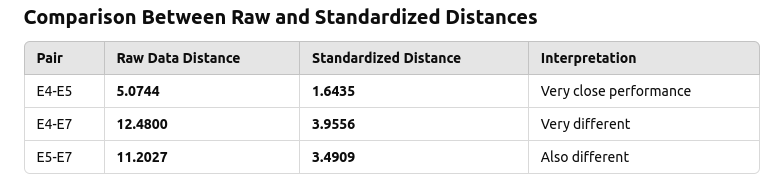

# B)- Principal Component Analysis (PCA)

## Q1

In [10]:
#Valeurs Propres & Vecteurs Propres (Eigenvalues & Eigenvectors)


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Step 1: Standardize the data (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 2: Compute the covariance matrix of the standardized data
cov_matrix = np.cov(X_standardized, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Display results
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 5: Organize results in a table
eigen_data = pd.DataFrame({
    "Eigenvalue": eigenvalues,
    "Explained Variance (%)": (eigenvalues / np.sum(eigenvalues)) * 100
})

print("\nEigenvalues and Explained Variance:\n", eigen_data)


Eigenvalues:
 [3.21954472e+00 1.29451627e+00 1.10603333e+00 4.76420198e-04
 4.42926059e-03]

Eigenvectors:
 [[-0.47639106 -0.53263677  0.15475344  0.61123017 -0.30298298]
 [-0.53024454 -0.40159625  0.09364365 -0.53076393  0.51679947]
 [-0.44812425  0.56963554 -0.22763607  0.44144992  0.47749743]
 [-0.53807342  0.37055187 -0.10934894 -0.38679883 -0.64155887]
 [-0.03941992  0.305328    0.95052978  0.01399912  0.03896199]]

Eigenvalues and Explained Variance:
    Eigenvalue  Explained Variance (%)
0    3.219545               57.236351
1    1.294516               23.013623
2    1.106033               19.662815
3    0.000476                0.008470
4    0.004429                0.078742


💡 The matrix used for this task is the correlation matrix 𝑅
, which is derived from the standardized data.









##Q2


In [11]:
#How to Verify if 𝑣 is an Eigenvector for Eigenvalue 𝜆 of Matrix A?
import numpy as np

def is_eigenvector(A, v, lambda_):
    """
    Verifies if v is an eigenvector associated with the eigenvalue lambda_ for matrix A.

    Parameters:
    - A: The matrix
    - v: The candidate eigenvector (should be a column vector)
    - lambda_: The eigenvalue associated with v

    Returns:
    - True if A @ v ≈ lambda_ * v, False otherwise.
    """
    # Compute A @ v
    Av = np.dot(A, v)

    # Compute lambda * v
    lambda_v = lambda_ * v

    # Check if they are approximately equal
    return np.allclose(Av, lambda_v)

# Example using previously computed eigenvalues and eigenvectors
A = np.cov(X_standardized, rowvar=False)  # Covariance matrix (or correlation matrix)
eigenvalues, eigenvectors = np.linalg.eig(A)  # Compute eigenvalues and eigenvectors

# Test the first eigenvector with its corresponding eigenvalue
lambda1 = eigenvalues[0]  # First eigenvalue
v1 = eigenvectors[:, 0]   # First eigenvector

# Verify if v1 is an eigenvector for lambda1
result = is_eigenvector(A, v1, lambda1)
print(f"Is v1 an eigenvector for lambda1? {result}")



Is v1 an eigenvector for lambda1? True


## Q3

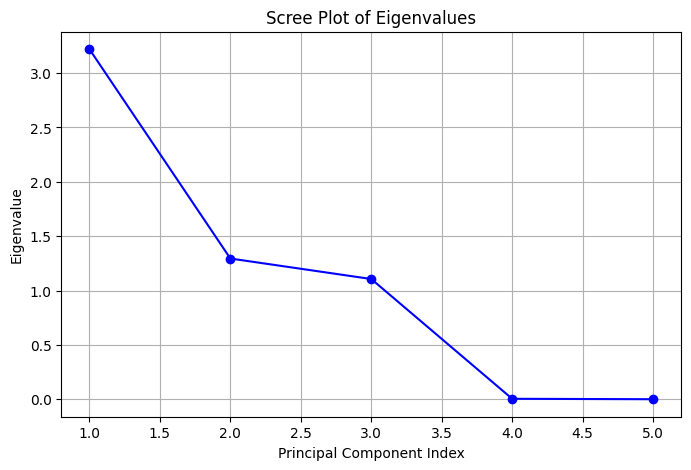

In [13]:
#Graphical Representation of Eigenvalues
import matplotlib.pyplot as plt

# Compute the covariance matrix (or correlation matrix)
A = np.cov(X_standardized, rowvar=False)

# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(A)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Eigenvalues')
plt.grid(True)
plt.show()


---

**Analyse the plot**

-  The x-axis represents the Principal Component Index.
-  The y-axis represents the Eigenvalues, which indicate the amount of variance captured by each principal component.
-  The plot shows a decreasing trend, meaning that the first few components capture most of the variance.

---
**Observation**
-   First component (PC1) has the highest eigenvalue (~3.2), capturing most of the variance.
-   Second component (PC2) has a significant eigenvalue (~1.4), but much lower than PC1.
-   Third component (PC3) has an eigenvalue slightly above 1, still contributing to the variance.
-   Fourth and fifth components have very low eigenvalues (~0 or close), indicating they contribute very little.

-> This means that a lower-dimensional representation (likely using the first 2 or 3 components) is sufficient for data visualization and analysis.

---
**Règle de coude**

*   Using the "Elbow Rule" (règle de coude) 🏔️ : The point where the curve starts to flatten (elbow point) suggests how many principal components to keep.


*   In this case, the "elbow" appears around PC2 or PC3, meaning that retaining two or three principal components should be enough to approximate the data structure effectively.



##Q4

In [14]:
from sklearn.decomposition import PCA
#Table of :
     # Eigenvalues (valeurs propres)
     # Variance Ratio (taux d'intertie)
     # Cumulative Variance (taux d'intertie cumulé)
# Standardizing the data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Performing PCA
pca = PCA()
pca.fit(X_standardized)

# Getting Eigenvalues
eigenvalues = pca.explained_variance_

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Creating DataFrame
df = pd.DataFrame({
    "Eigenvalues (Valeurs propres)": eigenvalues,
    "Explained Variance (%)": explained_variance_ratio * 100,
    "Cumulative Variance (%)": cumulative_variance * 100
})

# Displaying the table
print(df)


   Eigenvalues (Valeurs propres)  Explained Variance (%)  \
0                       3.219545               57.236351   
1                       1.294516               23.013623   
2                       1.106033               19.662815   
3                       0.004429                0.078742   
4                       0.000476                0.008470   

   Cumulative Variance (%)  
0                57.236351  
1                80.249973  
2                99.912788  
3                99.991530  
4               100.000000  


PS: The "elbow" in our scree plot supports keeping PC2 or PC3 ✅.

**📌 Explanation of np.cumsum() (Cumulative Sum)**
---
*   The function np.cumsum() calculates the cumulative sum of explained variance.
*   It helps in understanding how many components are needed to capture most of the variance in the data.

*  If the cumulative variance reaches 80% or more, it indicates that those components capture enough information, and others may be ignored.

--

## Q5

**Choosing the Factorial Subspace Dimension**

(proposer la dimension du sous espace factoriel
à retenir pour la visualisation des données.)

---
🔹 For simple 2D visualization: Use PC1 and PC2 (80.25% variance).

🔹 For more detailed 3D visualization: Use PC1, PC2, and PC3 (99.91% variance).

🔹 No need to use PC4 and PC5 because their contribution is negligible.

WHY?

->  The "elbow" in the scree plot appears around PC2 or PC3.

->  This means that adding more components beyond this point gives diminishing returns.


---

## Q6

**Choosing the Principal Axes for Factorial Subspace**

After selecting PC1, PC2, and optionally PC3 for the principal factorial subspace,
we now determine the corresponding principal axes (eigenvectors).



---

*   The principal axes (eigenvectors) correspond to the directions in which the data varies the most.
*   Since we chose PC1 and PC2 (or PC3 for 3D visualization), we need to extract the eigenvectors associated with the highest eigenvalues.
*   The retained axes will be the first 2 or 3 eigenvectors from the eigen decomposition of the covariance matrix.

---

In [15]:
# Convert to DataFrame
eigenvectors_df = pd.DataFrame(eigenvectors, columns=[f"Feature {i+1}" for i in range(eigenvectors.shape[1])])
eigenvectors_df.index = [f"PC{i+1}" for i in range(eigenvectors.shape[0])]

# Highlighting retained axes (PC1, PC2, PC3)
highlighted_axes = eigenvectors_df.iloc[:3]  # Keeping the first 2 or 3 PCs

print("All Eigenvectors:")
print(eigenvectors_df)

print("\nRetained Principal Axes (Factorial Subspace):")
print(highlighted_axes)


All Eigenvectors:
     Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
PC1  -0.476391  -0.532637   0.154753   0.611230  -0.302983
PC2  -0.530245  -0.401596   0.093644  -0.530764   0.516799
PC3  -0.448124   0.569636  -0.227636   0.441450   0.477497
PC4  -0.538073   0.370552  -0.109349  -0.386799  -0.641559
PC5  -0.039420   0.305328   0.950530   0.013999   0.038962

Retained Principal Axes (Factorial Subspace):
     Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
PC1  -0.476391  -0.532637   0.154753   0.611230  -0.302983
PC2  -0.530245  -0.401596   0.093644  -0.530764   0.516799
PC3  -0.448124   0.569636  -0.227636   0.441450   0.477497


## Q7

📌 7) Determining the Projections of Individuals.

*  We project individuals onto the factorial axes PC1, PC2 (and optionally PC3).

*   Formula used:  𝑍 =𝑋 ⋅𝑉

---


*  This transformation gives the new coordinates of individuals in the reduced principal component space.

*  It allows us to visualize how individuals are distributed according to the most important variance directions.








## Q8

In [16]:
#Calculating Projections of Individuals on Retained Principal Axes
# Standardizing the Data (Mean = 0, Variance = 1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Performing PCA
pca = PCA(n_components=3)  # Keeping PC1, PC2, and PC3
principal_components = pca.fit_transform(X_standardized)

# Converting to DataFrame
projection_df = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3"])
projection_df.index = [f"Indiv {i+1}" for i in range(X.shape[0])]

# Display results
print("\nProjections of Individuals onto Retained Principal Axes:")
print(projection_df)



Projections of Individuals onto Retained Principal Axes:
              PC1       PC2       PC3
Indiv 1 -2.785716 -0.676455 -0.736801
Indiv 2 -1.262490 -0.330338 -0.554950
Indiv 3 -1.016747  1.019829 -0.288088
Indiv 4  3.122145 -0.165843 -1.144268
Indiv 5  1.955100 -0.787905 -0.189212
Indiv 6 -0.947752 -1.201405  1.140111
Indiv 7 -0.324968  1.754739 -0.909513
Indiv 8  0.637341 -1.129857  0.691859
Indiv 9  0.623086  1.517236  1.990864


## Q9

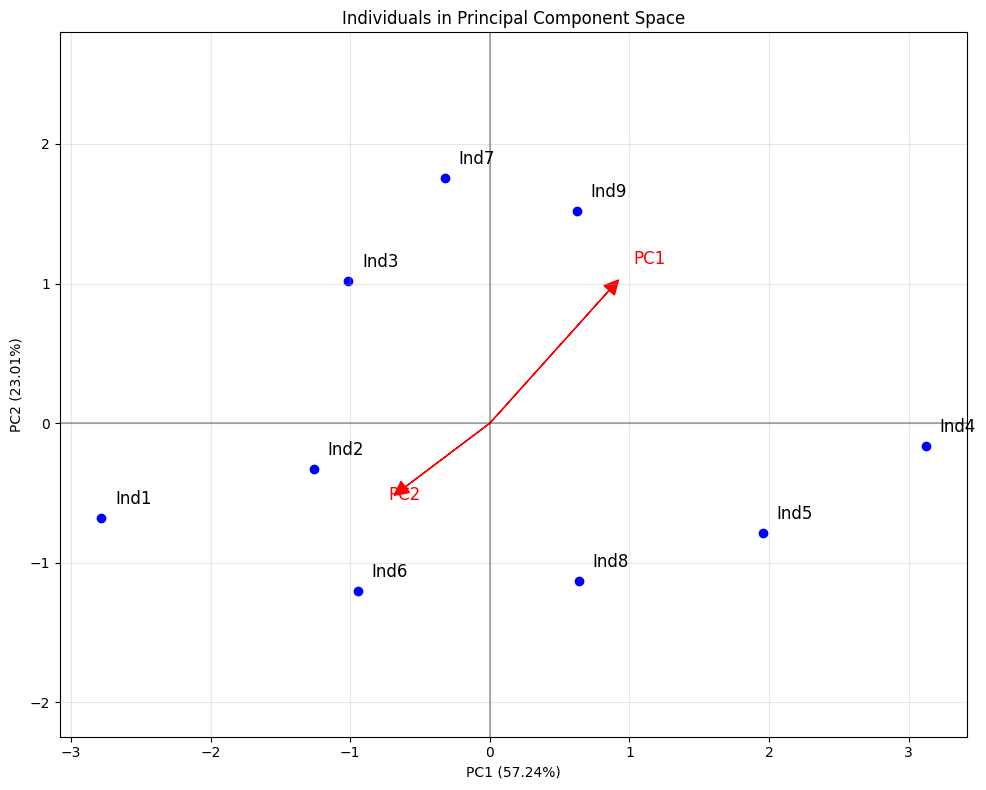

In [21]:

#Graphical Representation of Individuals in the Adjusted Subspace
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from scipy.spatial.distance import euclidean, pdist, squareform

# Standardizing the Data
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Extract eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Create a DataFrame with principal components
n_components = 2
columns = [f'PC{i+1}' for i in range(n_components)]
pc_df = pd.DataFrame(data=principal_components[:, :n_components], columns=columns)

# Plotting
plt.figure(figsize=(10, 8))

# Plot individuals
for i in range(len(X_standardized)):
    plt.scatter(principal_components[i, 0], principal_components[i, 1], color='blue')
    plt.text(principal_components[i, 0] + 0.1, principal_components[i, 1] + 0.1, f'Ind{i+1}', fontsize=12)

# Plot principal axes
for i in range(n_components):
    plt.arrow(0, 0, eigenvectors[i, 0] * np.sqrt(eigenvalues[i]),
              eigenvectors[i, 1] * np.sqrt(eigenvalues[i]),
              head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.text(eigenvectors[i, 0] * np.sqrt(eigenvalues[i]) * 1.2,
             eigenvectors[i, 1] * np.sqrt(eigenvalues[i]) * 1.2,
             f'PC{i+1}', color='red', fontsize=12)

# Add reference frame
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Customize plot
plt.grid(alpha=0.3)
plt.title('Individuals in Principal Component Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# Equal aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()

## Q10

### **Interpretations of the PCA Graph**  

#### **Importance of PC1:**  
- Since **PC1 has a longer arrow**, it explains **more variance** than PC2.  
- Most of the **variation in the dataset** occurs along this direction.  
- Individuals positioned along PC1 are **more separated**, indicating strong differentiation.  

#### **PC2’s Limited Contribution:**  
- **PC2 is shorter**, meaning it accounts for **less variance** than PC1.  
- Differences along PC2 are **less significant**, making it a weaker factor in data variation.  
- The **smaller spread** along PC2 confirms its lower impact.  

#### **Data Spread & Relationships:**  
- The **centered alignment** of the plot (around origin) suggests **zero mean**, expected after PCA standardization.  
- Some individuals align more with **PC1**, showing that their **variation is mostly captured by PC1**.  
- Others, like **Ind2 and Ind6**, have a stronger influence from **PC2**, though it contributes less variance.  
- Far from the center: Ind4 is positioned far from the origin, meaning it is quite different from most other individuals in the dataset.(potential outlier)


## Q11

In [23]:
# Calculate distances between specified individuals in the PCA subspace
individuals = [4, 5, 7]  # Given individuals (1-indexed)
individuals = [i - 1 for i in individuals]  # Convert to 0-based indexing

# Define pairs for distance calculation
pairs = [(individuals[0], individuals[1]),
         (individuals[0], individuals[2]),
         (individuals[1], individuals[2])]

# Compute Euclidean distances
results = {}
for i, j in pairs:
    distance = euclidean(principal_components[i], principal_components[j])
    results[f"E{i+1} and E{j+1}"] = distance

# Display results
results


{'E4 and E5': 1.6434603865784878,
 'E4 and E7': 3.9556187854885607,
 'E5 and E7': 3.4909023812121585}

##Q12

----
### Analysing and compring the results from part A and B :
-  PCA does not alter the relative distances between individuals but reduces the scale of variations.
-  It helps visualize key differences while filtering out noise and redundancies from the original data.
-  The proximity between E4 and E5 suggests that they share common characteristics, whereas E4 and E7 are much farther apart, indicating a greater difference between them.


💡 In summary: Standardization and PCA do not change the distance relationships but allow for a better representation of individuals in a reduced space while preserving essential information.









##Q13

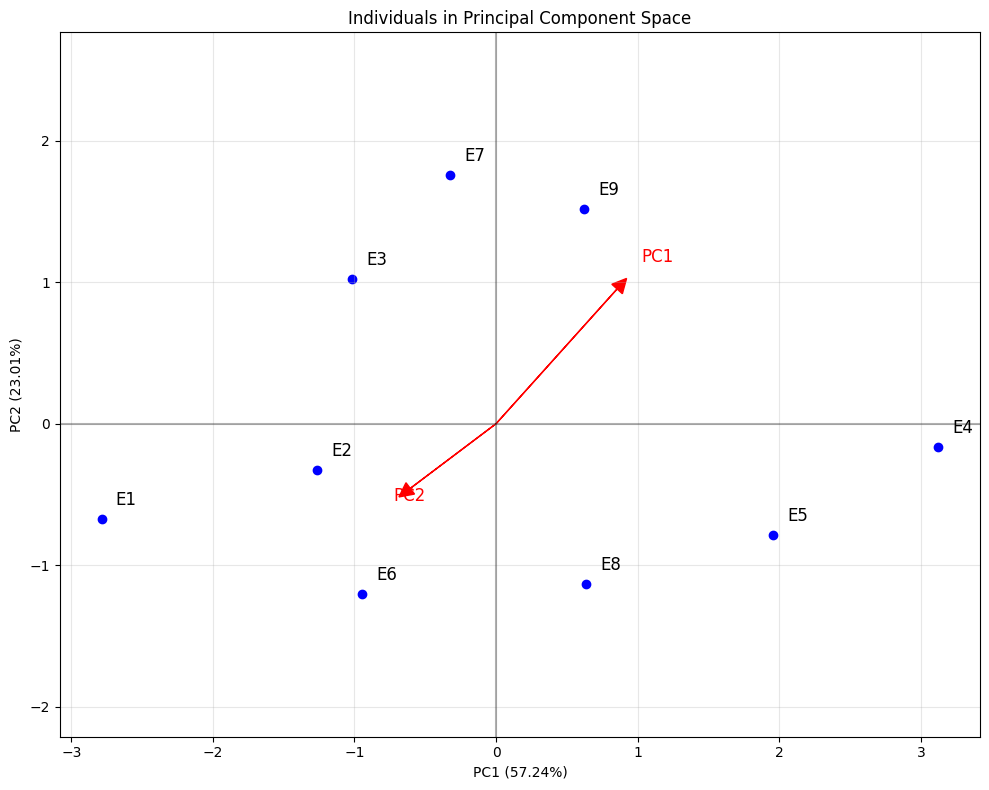


Squared distances to center in factorial subspace:
E1: 8.7641
E2: 2.0124
E3: 2.1608
E4: 11.0947
E5: 4.4889
E6: 3.6434
E7: 4.0140
E8: 2.1645
E9: 6.6572


In [24]:
#the squared distances to the center

import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA and obtain principal components
principal_components, pca_model = visualize_individuals_in_subspace(X_standardized, n_components=2)

# Calculate squared distances to the center
center = np.zeros(principal_components.shape[1])  # Origin in PCA space
squared_distances = {}

for i in range(principal_components.shape[0]):
    sq_dist = np.sum(principal_components[i]**2)  # Squared Euclidean distance
    squared_distances[f"E{i+1}"] = sq_dist

# Print squared distances
print("\nSquared distances to center in factorial subspace:")
for individual, sq_dist in squared_distances.items():
    print(f"{individual}: {sq_dist:.4f}")
